In [30]:
import matplotlib.pyplot as plt
import numpy as np
import string
import cv2 as cv
import math

QUESTION 1

Points 
 [[0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1.]]
H_1 
 [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 1.]]
H_2
 [[ 0.5        0.8660254  0.       ]
 [-0.8660254  0.5        0.       ]
 [ 0.         0.         1.       ]]
H_3 
 [[1. 0. 0.]
 [1. 1. 0.]
 [0. 0. 1.]]
H_4 
 [[2.  0.  0. ]
 [0.  2.  0. ]
 [0.3 0.5 1. ]]
H_5 
 [[1 0 5]
 [0 1 2]
 [0 0 1]]


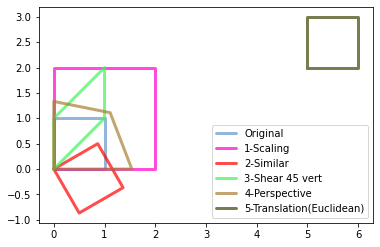

In [107]:

# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1) #In homogenous form
# matrix with row vectors of points
P = np.array([a, b, c, d]).T
P = P/P[-1, :]  #divide by the last row to get inhomogeneous coordinates no use here idk why
P = np.insert(P,4,P[:,0],axis=1) 
x = P[0, :] #first row of P
y = P[1, :] #second row of P
print("Points \n", P) 
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)                                                                     

#Original points                            
ax.plot(x, y, color='#6699cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#First transformation 
H_1 = np.identity(3)
H_1[0,0] = 2
H_1[1,1] = 2
H_1[2, 0] = 0
H_1[2, 1] = 0
print("H_1 \n",H_1)
Pt_1 = np.matmul(H_1, P)
Pt_1 = Pt_1/Pt_1[-1, :]  #Converting to inhomogeneous coordinates
Pt_1 = np.insert(Pt_1,4,Pt_1[:,0],axis=1) #take the first column and append to the last, so the last point is plotted twice completing the square, omfg
xt_1 = Pt_1[0, :]
yt_1 = Pt_1[1, :]
ax.plot(xt_1, yt_1, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#Second transformation
t = np.pi/3
H_2 = np.array(([np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]))
print("H_2\n",H_2)
Pt_2 = np.matmul(H_2,P) 
Pt_2 = Pt_2/Pt_2[-1, :]
Pt_2 = np.insert(Pt_2,4,Pt_2[:,0],axis=1)  
xt_2 = Pt_2[0, :]
yt_2 = Pt_2[1, :]
ax.plot(xt_2, yt_2, color='#ff0100', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


#third transformation
#H_3 = np.array(([-1,0,0], [0,1,0], [0., 0., 1.]))
#print("H_3 \n",H_3)
#Pt_3 = np.matmul(H_3,P)
#Pt_3 = Pt_3/Pt_3[-1, :]
#Pt_3 = np.insert(Pt_3,4,Pt_3[:,0],axis=1)  
#xt_3 = Pt_3[0, :]
#yt_3 = Pt_3[1, :]
#ax.plot(xt_3, yt_3, color='#42f55a', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
#ax.set_aspect('equal')

H_3 = np.array(([1,0,0], [1,1,0], [0., 0., 1.]))
print("H_3 \n",H_3)
Pt_3 = np.matmul(H_3,P)
Pt_3 = Pt_3/Pt_3[-1, :]
Pt_3 = np.insert(Pt_3,4,Pt_3[:,0],axis=1)  
xt_3 = Pt_3[0, :]
yt_3 = Pt_3[1, :]
ax.plot(xt_3, yt_3, color='#42f55a', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

H_4 = np.identity(3)
H_4[0,0] = 2
H_4[1,1] = 2
H_4[2, 0] = 0.3
H_4[2, 1] = 0.5
print("H_4 \n",H_4)
Pt_4 = np.matmul(H_4,P)
Pt_4 = Pt_4/Pt_4[-1, :]
Pt_4 = np.insert(Pt_4,4,Pt_4[:,0],axis=1)  
xt_4 = Pt_4[0, :]
yt_4 = Pt_4[1, :]
ax.plot(xt_4, yt_4, color='#a87f32', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
#fourth transformation
H_5 = np.array([[1,0,5],[0,1,2],[0,0,1]])
print("H_5 \n",H_5)
Pt_5 = np.matmul(H_5,P)
Pt_5 = Pt_5/Pt_5[-1, :]
Pt_5 = np.insert(Pt_5,4,Pt_5[:,0],axis=1)  
xt_5 = Pt_5[0, :]
yt_5 = Pt_5[1, :]
ax.plot(xt_5, yt_5, color='#404505', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
plt.legend(['Original','1-Scaling','2-Similar','3-Shear 45 vert','4-Perspective','5-Translation(Euclidean)'],loc='lower right')
ax.set_aspect('equal')
plt.show()

QUESTION 3

In [55]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:  
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/assn2/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
param = [p2, im4copy]
n = 0
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)
print(H)
(H, status) = cv.findHomography(p1, p2,0)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.imwrite('Q3.jpg',im4_warped)
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im4)
cv.waitKey(0)
cv.namedWindow("Stitched", cv.WINDOW_AUTOSIZE)
cv.imshow("Stitched", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[ 81.   9.]
 [610.  85.]
 [631. 409.]
 [382. 461.]
 [ 33. 346.]]
[[ 30. 142.]
 [344. 114.]
 [528. 360.]
 [465. 469.]
 [224. 474.]]
[[ 6.56577154e-01  6.66930489e-01 -2.80017613e+01]
 [-1.44387811e-01  9.55250451e-01  1.49509799e+02]
 [ 4.13200970e-04 -3.47799483e-05  1.00000000e+00]]


QUESTION 4

In [56]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1


im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/assn2/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1)
print(p2)

A = []
for i in range(len(p1)):
    pt1 = np.matrix([p1[i].item(0), p1[i].item(1), 1]) #convert to homogeneous
    pt2 = np.matrix([p2[i].item(0), p2[i].item(1), 1]) #convert to homogeneous

    ay = [0, 0, 0, -pt2.item(2) * pt1.item(0), -pt2.item(2) * pt1.item(1), -pt2.item(2) * pt1.item(2),
            pt2.item(1) * pt1.item(0), pt2.item(1) * pt1.item(1), pt2.item(1) * pt1.item(2)]
    ax = [-pt2.item(2) * pt1.item(0), -pt2.item(2) * pt1.item(1), -pt2.item(2) * pt1.item(2), 0, 0, 0,
            pt2.item(0) * pt1.item(0), pt2.item(0) * pt1.item(1), pt2.item(0) * pt1.item(2)]
    A.append(ax)
    A.append(ay)

matrixA = np.matrix(A)

#svd composition to calculate H using least squares
u, s, v = np.linalg.svd(matrixA)
# the last item of v orthogonal matrices gives the answer to H, reshape it into a 3x3 matrix
H = np.reshape(v[8], (3, 3))
H = (1/H.item(8)) * H 
print(H)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.imwrite('Q4.jpg',im4_warped)
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im4)
cv.waitKey(0)
cv.namedWindow("Stitched", cv.WINDOW_AUTOSIZE)
cv.imshow("Stitched", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[ 80.  10.]
 [612.  87.]
 [630. 411.]
 [382. 462.]
 [ 34. 344.]]
[[ 29. 144.]
 [343. 115.]
 [528. 360.]
 [466. 471.]
 [225. 475.]]
[[ 6.57694299e-01  6.70396380e-01 -2.89880486e+01]
 [-1.45762855e-01  9.54603223e-01  1.50889439e+02]
 [ 4.32185018e-04 -5.12931346e-05  1.00000000e+00]]


In [44]:
def calculateHomography(p1,p2):
    #loop through correspondences and create assemble matrix
    A = []
    for i in range(len(p1)):
        pt1 = np.matrix([p1[i].item(0), p1[i].item(1), 1]) #convert to homogeneous
        pt2 = np.matrix([p2[i].item(0), p2[i].item(1), 1]) #convert to homogeneous

        ay = [0, 0, 0, -pt2.item(2) * pt1.item(0), -pt2.item(2) * pt1.item(1), -pt2.item(2) * pt1.item(2),
              pt2.item(1) * pt1.item(0), pt2.item(1) * pt1.item(1), pt2.item(1) * pt1.item(2)]
        ax = [-pt2.item(2) * pt1.item(0), -pt2.item(2) * pt1.item(1), -pt2.item(2) * pt1.item(2), 0, 0, 0,
              pt2.item(0) * pt1.item(0), pt2.item(0) * pt1.item(1), pt2.item(0) * pt1.item(2)]
        A.append(ax)
        A.append(ay)

    matrixA = np.matrix(A)

    #svd composition to calculate H using least squares
    u, s, v = np.linalg.svd(matrixA)
    # the last item of v orthogonal matrices gives the answer to H, reshape it into a 3x3 matrix
    H = np.reshape(v[8], (3, 3))
    H = (1/H.item(8)) * H           #normalizing
    return H

QUESTION 2

In [48]:
im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('images/assn2/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
cv.imwrite('im1.jpg',im1)
cv.imwrite('im5.jpg',im5)
with open('images/assn2/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)
im1_warped = cv.warpPerspective(im1, H, (1000,1000))
#canvas = np.empty((1000,1000,3),dtype='uint8')
#for x in range(im1.shape[0]):
   # for y in range(im1.shape[1]):
  #      u = np.matmul(H,np.array([x,y,1]))[0]
  #      v = np.matmul(H,np.array([x,y,1]))[1]
   #     w = np.matmul(H,np.array([x,y,1]))[2]
   #     u=int(u/w)
  #      v=int(v/w)
    #    canvas[u][v][0]= im1[x][y][0]
    #    canvas[u][v][1]= im1[x][y][1]
    #    canvas[u][v][2]= im1[x][y][2]
#cv.namedWindow("canvas",cv.WINDOW_NORMAL)
#cv.imshow("canvas",canvas)
#cv.waitKey(0)
im1_warped[0:im1.shape[0], 0:im1.shape[1]] = im5
cv.imwrite('Q2.jpg',im1_warped)
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Stitched", cv.WINDOW_AUTOSIZE)
cv.imshow("Stitched", im1_warped)
cv.waitKey(0)
cv.destroyAllWindows()


[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


In [88]:
with open('images/assn2/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)

canvas = np.empty((1000,1000,3),dtype='uint8')
h, w = im1.shape[0:2]
Y, X = np.indices((h,w))                                                
homo_coods = np.stack((X.ravel(), Y.ravel(), np.ones(Y.size)))
homo_coods_trans = H.dot(homo_coods)
homo_coods_trans /= homo_coods_trans[2,:]
iteration =0
for row in range(im1.shape[0]):
    for col in range(im1.shape[1]):
        v = homo_coods_trans[0][iteration]
        u = homo_coods_trans[1][iteration]
        u = int(round(u))
        v = int(round(v))
        canvas[u][v] = im1[row,col]
        iteration += 1
canvas[0:im1.shape[0], 0:im1.shape[1]] = im5
cv.imwrite('Q2.jpg',canvas)
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Stitched", cv.WINDOW_AUTOSIZE)
cv.imshow("Stitched", canvas)
cv.waitKey(0)
cv.destroyAllWindows()


[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


In [69]:
lin_homg_pts

array([[  0.,   1.,   2., ..., 797., 798., 799.],
       [  0.,   0.,   0., ..., 639., 639., 639.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.]])

In [84]:
cv.namedWindow("warped",cv.WINDOW_AUTOSIZE)
cv.imshow("warped",canvas)
cv.waitKey(0)
cv.destroyAllWindows()


In [39]:
trans_lin_homg_pts

array([[222.01217   , 222.5281047 , 223.04353208, ..., 553.30252517,
        553.56041993, 553.81812939],
       [-25.605611  , -25.37072006, -25.13606009, ..., 654.71625848,
        654.64338007, 654.57055403],
       [  1.        ,   1.        ,   1.        , ...,   1.        ,
          1.        ,   1.        ]])

Q5 SUPER GLUE AND RANSAC

In [6]:
path = 'C:/Users/menuw/Documents/Modules/Semester_4/EN2550_Computer_Vision/SuperGluePretrainedNetwork/dump_match_pairs/img1_img4_matches.npz'
npz = np.load(path)
threshold = 0.8
length = 0
for i in range(npz['matches'].shape[0]):
    if npz['match_confidence'][i] > threshold:
        length += 1
kp0 = np.empty((length,2),dtype='float32')
kp1 = np.empty((length,2),dtype ='float32')
j=0
for i in range(npz['keypoints0'].shape[0]):
    if npz['matches'][i] > -1:
        if npz['match_confidence'][i] > threshold:
            kp0[j][0]=npz['keypoints0'][i][0]
            kp0[j][1]=npz['keypoints0'][i][1]
            kp1[j][0]=npz['keypoints1'][npz['matches'][i]][0]
            kp1[j][1]=npz['keypoints1'][npz['matches'][i]][1]
            j +=1
(Homo, status) = cv.findHomography(kp0, kp1,cv.RANSAC,6)
#np.set_printoptions(precision=3)
print(Homo)
im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/assn2/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(Homo), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.imwrite('Q5_SUPER_GLUE_RANSAC.jpg',im4_warped)
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Stitched",im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[ 6.82138130e-01  6.97584233e-01 -3.75023822e+01]
 [-1.41716073e-01  9.87390300e-01  1.47696141e+02]
 [ 4.50428956e-04  4.62475756e-06  1.00000000e+00]]


In [7]:
npz.files

['keypoints0', 'keypoints1', 'matches', 'match_confidence']

In [2]:
print(npz['keypoints0'].shape)
print(npz['keypoints1'].shape)
print(npz['matches'].shape)
print(npz['match_confidence'].shape)

NameError: name 'npz' is not defined

Q5 MULTIPLE IMAGES


In [8]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
p3 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:  
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('images/assn2/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/assn2/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im6 = cv.imread('images/assn2/graf/img6.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im4copy = im4.copy()
im6copy = im6.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p3, im6copy]
n = 0

cv.namedWindow("Image 6", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 6',draw_circle, param)

while(1):
    cv.imshow("Image 6", im6copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)
print(p3)
(H1, status) = cv.findHomography(p1, p2,0)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H1), (900,900))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
#################################################
(H2, status) = cv.findHomography(p1, p3,0)
im6_warped = cv.warpPerspective(im6, np.linalg.inv(H2), (2000,2000))
im6_warped[0:im4_warped.shape[0], 0:im4_warped.shape[1]] = im4_warped
cv.imwrite('Q5_MULTI_IMAGES.jpg',im6_warped)
#################################################
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im4)
cv.waitKey(0)
cv.namedWindow("Image 6", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 6", im6)
cv.waitKey(0)
cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)
cv.namedWindow("Final", cv.WINDOW_AUTOSIZE)
cv.imshow("Final", im6_warped)
cv.waitKey(0)
cv.destroyAllWindows()
cv.destroyAllWindows()
cv.destroyAllWindows()

[[ 80.   8.]
 [610.  88.]
 [628. 412.]
 [382. 462.]
 [ 33. 343.]]
[[ 29. 143.]
 [344. 115.]
 [529. 361.]
 [465. 469.]
 [225. 474.]]
[[464.   2.]
 [501. 236.]
 [345. 501.]
 [267. 509.]
 [239. 322.]]


<StemContainer object of 3 artists>

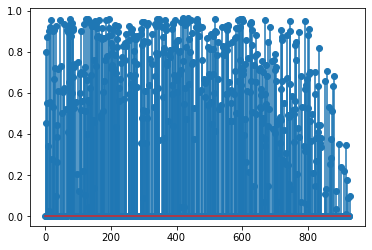

In [46]:
length = npz["match_confidence"].shape[0]
x= np.arange(0,length,1)
npz["match_confidence"]
plt.stem(x,npz["match_confidence"])

In [4]:
with open('images/assn2/graf/H1to4p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)

[[0.66378505, 0.68003334, -31.230335], [-0.144955, 0.97128304, 148.7742], [0.00042518504, -1.3930359e-05, 1.0]]


In [12]:
im4 = cv.imread('images/assn2/graf/img4.ppm', cv.IMREAD_ANYCOLOR) T
cv.imwrite("im4.jpg",im4)

True

In [18]:
a =[[0.66378505, 0.68003334, -31.230335],[-0.144955, 0.97128304, 148.7742],[0.00042518504, -1.3930359e-05, 1.0]]
b = np.array[[ 6.56577154e-01,6.66930489e-01,-2.80017613e+01][-1.44387811e-01,9.55250451e-01, 1.49509799e+02][ 4.13200970e-04, -3.47799483e-05,  1.00000000e+00]]

<>:2: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:2: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-18-5c72d8668dad>:2: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  b = np.array[[ 6.56577154e-01,6.66930489e-01,-2.80017613e+01][-1.44387811e-01,9.55250451e-01, 1.49509799e+02][ 4.13200970e-04, -3.47799483e-05,  1.00000000e+00]]


TypeError: list indices must be integers or slices, not tuple